# 02 ANN AVEC DES DONNEES


<img src = "images/neural network 3 layers.png">


## Importer les librairies

In [1]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Matplotlib
import matplotlib.pyplot as plt

# Numpy and Pandas
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler

## Importer le dataset

In [2]:
dataset = pd.read_csv('datasets/titanic.csv')

In [3]:
dataset.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Préparer les données

In [4]:
#Premier tri
dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
# Modification des variables catégoriques
dataset.Sex = dataset.Sex.map({'male': 0, 'female': 1})
dataset.head()


,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [6]:
# Séparation du dataset
target = dataset.Survived.values
dataset.drop(['Survived'],axis='columns',inplace=True)

data = dataset.astype(float)
data.Age = data.Age.fillna(data.Age.mean())
data = data.values


In [7]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[ 0.82737724, -0.73769513, -0.5924806 , -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        , -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.49237783]])

## CREATION DU MODELE


In [8]:
model = Sequential()

# Add the layers
model.add(Dense(4, activation="relu"))

model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


## ENTRAINEMENT

In [9]:
history = model.fit(data,target, epochs=50,batch_size=10,validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 1s 1ms/sample - loss: 0.6830 - accuracy: 0.6053 - val_loss: 0.6694 - val_accuracy: 0.6480
Epoch 2/50
712/712 [==============================] - 0s 229us/sample - loss: 0.6677 - accuracy: 0.6419 - val_loss: 0.6534 - val_accuracy: 0.6760
Epoch 3/50
712/712 [==============================] - 0s 228us/sample - loss: 0.6552 - accuracy: 0.6601 - val_loss: 0.6378 - val_accuracy: 0.7151
Epoch 4/50
712/712 [==============================] - 0s 239us/sample - loss: 0.6427 - accuracy: 0.6868 - val_loss: 0.6216 - val_accuracy: 0.7374
Epoch 5/50
712/712 [==============================] - 0s 229us/sample - loss: 0.6292 - accuracy: 0.7065 - val_loss: 0.6033 - val_accuracy: 0.7486
Epoch 6/50
712/712 [==============================] - 0s 225us/sample - loss: 0.6141 - accuracy: 0.7233 - val_loss: 0.5839 - val_accuracy: 0.7765
Epoch 7/50
712/712 [==============================] - 0s 230us/sample - loss: 0.

In [11]:
topred = scaler.transform([[3,0,22,40]])


prediction = model.predict(topred)
print("DiCaprio chance de survivre:", prediction[0][1])


DiCaprio chance de survivre: 0.13336709


## COURBE D'APPRENTISSAGE

### LES VALEURS STOCKEES

In [12]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### CONSTRUCTION DU GRAPHIQUE

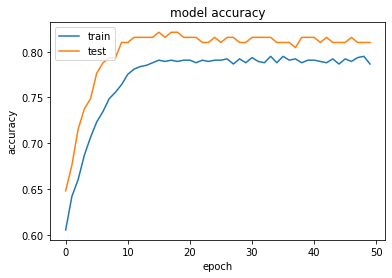

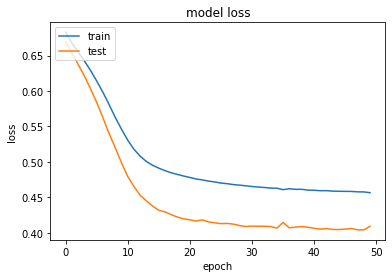

In [13]:
import matplotlib.pyplot as plt


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()